## Decision Information Demo

This notebook demonstrates calculating Decision Information for a simple grid world with Manhattan actions.

In [1]:
from env.grid_room import GridRoom
from planning.information_to_go_state import InformationToGoState
from planning.state_distribution import LiveStateDistribution
from planning.policy import Policy
from utility import display as di

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [3]:
# grid world parameters
shape = (11, 11)  # grid world shape
theta = 1e-5      # convergence criteria

In [4]:
# define the goal in the middle of the grid
goals = [int(np.product(shape)/2)] # middle

In [5]:
# pass the grid world configuration as a dictionary
options = {'shape': shape, 'goals': goals, 'manhattan': True, 'determinism': True}
env = GridRoom(options)
state_dist = LiveStateDistribution(env)
print(env)

o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  G  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o



In [6]:
# tradeoff parameter used to weight the priority between performance 
# and information processing
beta = 0.1

In [7]:
# create the object to calculate decision information for the environment
ig = InformationToGoState(env, state_dist, theta)

In [8]:
# calculate the policy that minimises the free energy
policy, Z, F = ig.get_opt_policy_Z_free_vector(beta);

In [9]:
# let's inspect this policy
pi = Policy(env, policy)
print(pi)

grid shape: (11, 11) 
policy: [nS x nA]: states in rows, actions in columns
            0         1         2         3
0    0.233267  0.266733  0.266733  0.233267
1    0.233266  0.287867  0.274868  0.203999
2    0.233264  0.289315  0.288401  0.189020
3    0.233263  0.274175  0.304490  0.188071
4    0.233262  0.248305  0.319977  0.198455
..        ...       ...       ...       ...
116  0.319977  0.198455  0.233262  0.248305
117  0.304490  0.188071  0.233263  0.274175
118  0.288401  0.189020  0.233264  0.289315
119  0.274868  0.203999  0.233266  0.287867
120  0.266733  0.233267  0.233267  0.266733

[121 rows x 4 columns]


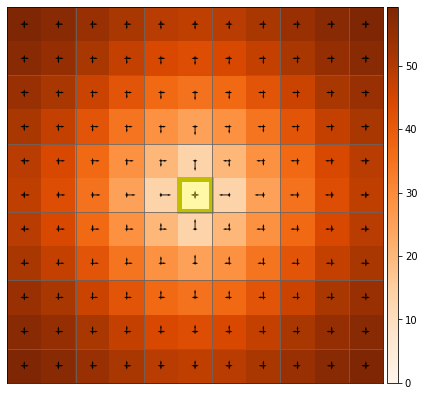

In [10]:
# plot the free energy values for each state
di.plot_quiver_heatmap_var(env, F.astype(float), policy)

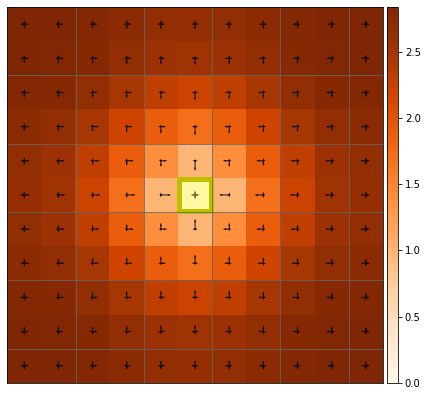

In [11]:
# plot the decision information values for each state
I = ig.get_information_to_go_given_policy(policy)
di.plot_quiver_heatmap_var(env, I.astype(float), policy)

### Plotting the 'live' distribution
The live distribution is the stationary state distribution of an agent following a particular policy.  The plot below shows this distribution for an following the policy shown above.

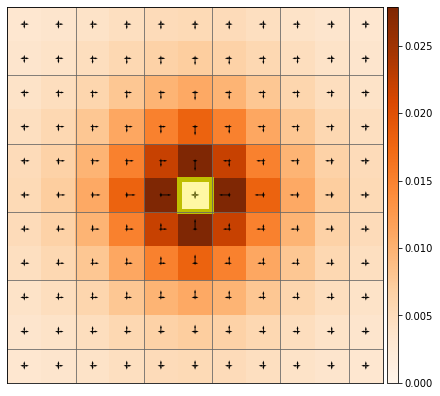

In [12]:
# plot the live state distribution
p_s = ig.state_dist.set_ps(policy)
di.plot_quiver_heatmap_var(env, p_s.astype(float), policy)

In [13]:
# print the probability values for the policy 
print(pi)

grid shape: (11, 11) 
policy: [nS x nA]: states in rows, actions in columns
            0         1         2         3
0    0.233267  0.266733  0.266733  0.233267
1    0.233266  0.287867  0.274868  0.203999
2    0.233264  0.289315  0.288401  0.189020
3    0.233263  0.274175  0.304490  0.188071
4    0.233262  0.248305  0.319977  0.198455
..        ...       ...       ...       ...
116  0.319977  0.198455  0.233262  0.248305
117  0.304490  0.188071  0.233263  0.274175
118  0.288401  0.189020  0.233264  0.289315
119  0.274868  0.203999  0.233266  0.287867
120  0.266733  0.233267  0.233267  0.266733

[121 rows x 4 columns]


In [14]:
# plot states visited while following a policy
def plot_trajectories(env, trajectories, g, height=7, ax=None, filename=None):
    env.shape
    if ax is None:
        fig, ax = plt.subplots(figsize=di.get_figsize(env.shape, height))
        fig.tight_layout()
    ax.set_xticks(np.arange(0,  env.shape[1], 1))
    ax.set_xticks(np.arange(-0.5,  env.shape[1]+0.5, 1), minor=True)
    ax.set_xlim(-0.5, env.shape[1]-0.5)
    # ax.set_xticklabels(np.arange(0, env.shape[1]))
    ax.set_xticklabels([])
    ax.xaxis.tick_top()
    ax.set_yticks(np.arange(0, env.shape[0], 1))
    ax.set_yticks(np.arange(-0.5, env.shape[0]+0.5, 1), minor=True)
    ax.set_ylim(env.shape[0]-0.5, -0.5)
    # ax.set_yticklabels(np.arange(0, env.shape[0]))
    ax.set_yticklabels([])

    ax.grid(b=True, which='minor', color='#666666', linestyle='-')

    # add goal to plot
    gy, gx = env.get_multi_index(g)
    rect = patches.Rectangle((gx-0.4925, gy-0.4925), 0.95, 0.95, linewidth=5, edgecolor='y', fc=(1,1,0,0.3))
    ax.add_patch(rect)

    for trajectory in trajectories:
        y, x = list(zip(*map(env.get_multi_index, trajectory)))
        ax.scatter(x, y, alpha=0.002, c='darkblue', marker='s', s=2000)
        #print(trajectory)

    if filename:
        plt.savefig(filename,
                    bbox_inches='tight',
                    pad_inches=0)
        print(filename)
    return ax

(array([107.,  92., 104.,  92., 101., 107.,  82.,  98., 112., 105.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <a list of 10 Patch objects>)

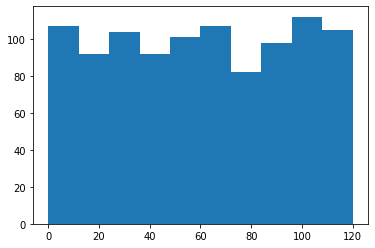

In [15]:
# select starting state from the initial state distribution (env.isd)
isd_samples = np.random.choice(env.nS, 1000, p=env.isd)
plt.hist(isd_samples)

### Visualisation of Actual Trajectories
The plot below shows a quick visualisation of 1,000 sampled trajectories for an agent following the policy shown above.

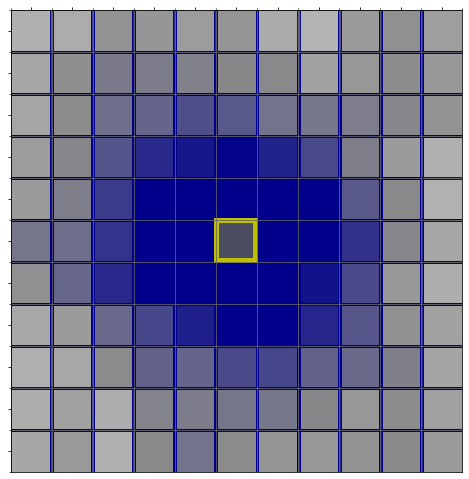

In [16]:
trajectories = []
g = env.goals[0]
for s in isd_samples:
    trajectories.append(env.get_state_sequence(s, g, policy, max_iters=100))
    # print(trajectories[-1])
ax = plot_trajectories(env, trajectories, g)
plt.show()